In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [4]:
articles = pd.read_csv('../Data/Gaza_textcontain_after_new.csv')
authors = pd.read_csv('../Data/Gaza_textcontain_after_new_authors.csv')

In [5]:
articles

article_title  \
0    Palestinian death toll in Gaza from Israeli at...   
1    Daily life at Al-Maghazi refugee camp in Gaza ...   
2    Two-State solution only way to break vicious c...   
3          Biden to deliver State of the Union address   
4    Houthi attacks in Red Sea reports first fatali...   
..                                                 ...   
485  Political efforts must be intensified to solve...   
486  US biased attitude in Israel-Palestine conflic...   
487  US inability to reconcile Israel-Palestine con...   
488  Israel’s deepening attacks in Gaza likely to e...   
489  GT Exclusive: Mainland tax, natural resource a...   

                           author  \
0                       By Xinhua   
1                       By Xinhua   
2                 By Global Times   
3           By GT staff reporters   
4                     By Fan Anqi   
..                            ...   
485  By Xie Wenting and Bai Yunyi   
486                 By Ma Xiaolin   
487               By Global Times   
488                    Zhao Yusha   
489                       Liu Xin   

                                        published_time  \
0                     Published: Mar 07, 2024 10:34 AM   
1                     Published: Mar 07, 2024 11:44 AM   
2                     Published: Mar 07, 2024 12:50 PM   
3                     Published: Mar 07, 2024 10:28 PM   
4                     Published: Mar 07, 2024 10:58 PM   
..                                                 ...   
485                   Published: Oct 22, 2023 06:32 PM   
486                   Published: Oct 22, 2023 08:21 PM   
487                   Published: Oct 22, 2023 08:32 PM   
488  Published: Oct 22, 2023 09:31 PM Updated: Oct ...   
489                   Published: Oct 22, 2023 10:05 PM   

                                          article_text article_category_one  \
0    A young man walks past destroyed buildings in ...                PHOTO   
1    A vendor makes desserts at Al-Maghazi refugee ...                PHOTO   
2    People walk past destroyed buildings in the so...                CHINA   
3    US President Joe Biden speaks during a meeting...                CHINA   
4    A container ship sails in the Red Sea in the S...                CHINA   
..                                                 ...                  ...   
485  Teams conduct a search and rescue operation un...             IN-DEPTH   
486  Illustration: Liu Rui/ GTAny act that leads to...              OPINION   
487  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...              OPINION   
488  Leaders and top officials from more than a doz...                CHINA   
489  Foxconn Photo: VCGChinese mainland tax authori...                CHINA   

    article_category_two                                picture_description  
0                  WORLD  A young man walks past destroyed buildings in ...  
1                  WORLD  A vendor makes desserts at Al-Maghazi refugee ...  
2               POLITICS  People walk past destroyed buildings in the so...  
3              DIPLOMACY  US President Joe Biden speaks during a meeting...  
4              DIPLOMACY  A container ship sails in the Red Sea in the S...  
..                   ...                                                ...  
485   DIPLOMATIC CHANNEL  Teams conduct a search and rescue operation un...  
486            VIEWPOINT                          Illustration: Liu Rui/ GT  
487             OBSERVER  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...  
488            DIPLOMACY  Leaders and top officials from more than a doz...  
489             POLITICS                                 Foxconn Photo: VCG  

[490 rows x 7 columns]

In [6]:
# date published
#remoe where published time = published time not found

articles = articles.drop(articles[articles['published_time'] == 'Published time not found'].index)

articles['published_time'] = articles['published_time'].str[11:]
articles['published_time'] = articles['published_time'].str[:12]
#to date mmm dd, yyyy
articles['published_time'] = pd.to_datetime(articles['published_time'], format='%b %d, %Y')
articles

article_title  \
0    Palestinian death toll in Gaza from Israeli at...   
1    Daily life at Al-Maghazi refugee camp in Gaza ...   
2    Two-State solution only way to break vicious c...   
3          Biden to deliver State of the Union address   
4    Houthi attacks in Red Sea reports first fatali...   
..                                                 ...   
485  Political efforts must be intensified to solve...   
486  US biased attitude in Israel-Palestine conflic...   
487  US inability to reconcile Israel-Palestine con...   
488  Israel’s deepening attacks in Gaza likely to e...   
489  GT Exclusive: Mainland tax, natural resource a...   

                           author published_time  \
0                       By Xinhua     2024-03-07   
1                       By Xinhua     2024-03-07   
2                 By Global Times     2024-03-07   
3           By GT staff reporters     2024-03-07   
4                     By Fan Anqi     2024-03-07   
..                            ...            ...   
485  By Xie Wenting and Bai Yunyi     2023-10-22   
486                 By Ma Xiaolin     2023-10-22   
487               By Global Times     2023-10-22   
488                    Zhao Yusha     2023-10-22   
489                       Liu Xin     2023-10-22   

                                          article_text article_category_one  \
0    A young man walks past destroyed buildings in ...                PHOTO   
1    A vendor makes desserts at Al-Maghazi refugee ...                PHOTO   
2    People walk past destroyed buildings in the so...                CHINA   
3    US President Joe Biden speaks during a meeting...                CHINA   
4    A container ship sails in the Red Sea in the S...                CHINA   
..                                                 ...                  ...   
485  Teams conduct a search and rescue operation un...             IN-DEPTH   
486  Illustration: Liu Rui/ GTAny act that leads to...              OPINION   
487  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...              OPINION   
488  Leaders and top officials from more than a doz...                CHINA   
489  Foxconn Photo: VCGChinese mainland tax authori...                CHINA   

    article_category_two                                picture_description  
0                  WORLD  A young man walks past destroyed buildings in ...  
1                  WORLD  A vendor makes desserts at Al-Maghazi refugee ...  
2               POLITICS  People walk past destroyed buildings in the so...  
3              DIPLOMACY  US President Joe Biden speaks during a meeting...  
4              DIPLOMACY  A container ship sails in the Red Sea in the S...  
..                   ...                                                ...  
485   DIPLOMATIC CHANNEL  Teams conduct a search and rescue operation un...  
486            VIEWPOINT                          Illustration: Liu Rui/ GT  
487             OBSERVER  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...  
488            DIPLOMACY  Leaders and top officials from more than a doz...  
489             POLITICS                                 Foxconn Photo: VCG  

[489 rows x 7 columns]

In [7]:
#stats published time
articles['author'].unique()

array(['By Xinhua', 'By Global Times', 'By GT staff reporters',
       'By Fan Anqi', 'By Mark Blacklock', 'By VCG', 'By Xin Ping',
       'By Zhang Han', 'Shan Jie', 'By Brian Berletic', 'Yang Sheng',
       'By S.L. Kanthan', 'By Ma Yuhan', 'By Elias Cepeda', 'Zhao Yusha',
       'By Chen Hong', 'By IC', 'Bradley Blankenship', 'Wang Qi',
       'By Zhao Yongsheng', 'By Wang Shushen', 'By Timofei Bordachev',
       'By Bai Yunyi', 'Chen Qingqing', 'Ding Gang', 'By Zhang Wenzong',
       'By James Smith', 'By Xu Yelu', 'By Xia Wenxin', 'Andrey Kortunov',
       'By Wang Jin', 'By Xie Wenting and Bai Yunyi', 'Wang Cong',
       'Deng Xiaoci', 'By Joyce Chimbi', 'By Andrey Gubin',
       'By Victor Gao', 'By AFP', 'By Wang Yan and Zhang Yuanshi',
       'By Qian Jiayin', 'Hu Xijin', 'By Jerry Grey', 'By Jin Cuodao',
       'By Yin Yeping', 'By Jan Oberg', 'Vitaly Podvitski', 'Liu Xin',
       'Liu Caiyu', 'By Ma Ruiqian', 'By Ebrahim Hashem', 'By Guo Yichu',
       'Martin Jacques', 'By 

In [8]:
# celan authors
articles['author'] = articles['author'].apply(lambda x: x[3:] if x.startswith("By ") else x)
articles

article_title  \
0    Palestinian death toll in Gaza from Israeli at...   
1    Daily life at Al-Maghazi refugee camp in Gaza ...   
2    Two-State solution only way to break vicious c...   
3          Biden to deliver State of the Union address   
4    Houthi attacks in Red Sea reports first fatali...   
..                                                 ...   
485  Political efforts must be intensified to solve...   
486  US biased attitude in Israel-Palestine conflic...   
487  US inability to reconcile Israel-Palestine con...   
488  Israel’s deepening attacks in Gaza likely to e...   
489  GT Exclusive: Mainland tax, natural resource a...   

                        author published_time  \
0                       Xinhua     2024-03-07   
1                       Xinhua     2024-03-07   
2                 Global Times     2024-03-07   
3           GT staff reporters     2024-03-07   
4                     Fan Anqi     2024-03-07   
..                         ...            ...   
485  Xie Wenting and Bai Yunyi     2023-10-22   
486                 Ma Xiaolin     2023-10-22   
487               Global Times     2023-10-22   
488                 Zhao Yusha     2023-10-22   
489                    Liu Xin     2023-10-22   

                                          article_text article_category_one  \
0    A young man walks past destroyed buildings in ...                PHOTO   
1    A vendor makes desserts at Al-Maghazi refugee ...                PHOTO   
2    People walk past destroyed buildings in the so...                CHINA   
3    US President Joe Biden speaks during a meeting...                CHINA   
4    A container ship sails in the Red Sea in the S...                CHINA   
..                                                 ...                  ...   
485  Teams conduct a search and rescue operation un...             IN-DEPTH   
486  Illustration: Liu Rui/ GTAny act that leads to...              OPINION   
487  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...              OPINION   
488  Leaders and top officials from more than a doz...                CHINA   
489  Foxconn Photo: VCGChinese mainland tax authori...                CHINA   

    article_category_two                                picture_description  
0                  WORLD  A young man walks past destroyed buildings in ...  
1                  WORLD  A vendor makes desserts at Al-Maghazi refugee ...  
2               POLITICS  People walk past destroyed buildings in the so...  
3              DIPLOMACY  US President Joe Biden speaks during a meeting...  
4              DIPLOMACY  A container ship sails in the Red Sea in the S...  
..                   ...                                                ...  
485   DIPLOMATIC CHANNEL  Teams conduct a search and rescue operation un...  
486            VIEWPOINT                          Illustration: Liu Rui/ GT  
487             OBSERVER  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...  
488            DIPLOMACY  Leaders and top officials from more than a doz...  
489             POLITICS                                 Foxconn Photo: VCG  

[489 rows x 7 columns]

In [9]:
articles['article_text'] = articles.apply(lambda x: x['article_text'].replace(x['picture_description'], ''), axis=1)
articles

article_title  \
0    Palestinian death toll in Gaza from Israeli at...   
1    Daily life at Al-Maghazi refugee camp in Gaza ...   
2    Two-State solution only way to break vicious c...   
3          Biden to deliver State of the Union address   
4    Houthi attacks in Red Sea reports first fatali...   
..                                                 ...   
485  Political efforts must be intensified to solve...   
486  US biased attitude in Israel-Palestine conflic...   
487  US inability to reconcile Israel-Palestine con...   
488  Israel’s deepening attacks in Gaza likely to e...   
489  GT Exclusive: Mainland tax, natural resource a...   

                        author published_time  \
0                       Xinhua     2024-03-07   
1                       Xinhua     2024-03-07   
2                 Global Times     2024-03-07   
3           GT staff reporters     2024-03-07   
4                     Fan Anqi     2024-03-07   
..                         ...            ...   
485  Xie Wenting and Bai Yunyi     2023-10-22   
486                 Ma Xiaolin     2023-10-22   
487               Global Times     2023-10-22   
488                 Zhao Yusha     2023-10-22   
489                    Liu Xin     2023-10-22   

                                          article_text article_category_one  \
0     \n\nPeople walk past destroyed buildings in t...                PHOTO   
1     \n\nChildren are pictured at Al-Maghazi refug...                PHOTO   
2    There is no distinction between noble and humb...                CHINA   
3    US President Joe Biden is expected to deliver ...                CHINA   
4    A Houthi missile attack on a merchant ship in ...                CHINA   
..                                                 ...                  ...   
485  Editor's Note:The death toll among Palestinian...             IN-DEPTH   
486  Any act that leads to civilian deaths and othe...              OPINION   
487  US media is currently attempting to redirect t...              OPINION   
488  Israel's deepening attacks in Gaza for what it...                CHINA   
489  Chinese mainland tax authorities have conducte...                CHINA   

    article_category_two                                picture_description  
0                  WORLD  A young man walks past destroyed buildings in ...  
1                  WORLD  A vendor makes desserts at Al-Maghazi refugee ...  
2               POLITICS  People walk past destroyed buildings in the so...  
3              DIPLOMACY  US President Joe Biden speaks during a meeting...  
4              DIPLOMACY  A container ship sails in the Red Sea in the S...  
..                   ...                                                ...  
485   DIPLOMATIC CHANNEL  Teams conduct a search and rescue operation un...  
486            VIEWPOINT                          Illustration: Liu Rui/ GT  
487             OBSERVER  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...  
488            DIPLOMACY  Leaders and top officials from more than a doz...  
489             POLITICS                                 Foxconn Photo: VCG  

[489 rows x 7 columns]

In [10]:
#drop duplicates
authors.drop_duplicates(inplace=True)
#merge articles and authors
df =  articles.join(authors.set_index('author_name'), on='author', how='left')
df.replace(pd.NA, 'Author details not found', inplace=True)
df

article_title  \
0    Palestinian death toll in Gaza from Israeli at...   
1    Daily life at Al-Maghazi refugee camp in Gaza ...   
2    Two-State solution only way to break vicious c...   
3          Biden to deliver State of the Union address   
4    Houthi attacks in Red Sea reports first fatali...   
..                                                 ...   
485  Political efforts must be intensified to solve...   
486  US biased attitude in Israel-Palestine conflic...   
487  US inability to reconcile Israel-Palestine con...   
488  Israel’s deepening attacks in Gaza likely to e...   
489  GT Exclusive: Mainland tax, natural resource a...   

                        author published_time  \
0                       Xinhua     2024-03-07   
1                       Xinhua     2024-03-07   
2                 Global Times     2024-03-07   
3           GT staff reporters     2024-03-07   
4                     Fan Anqi     2024-03-07   
..                         ...            ...   
485  Xie Wenting and Bai Yunyi     2023-10-22   
486                 Ma Xiaolin     2023-10-22   
487               Global Times     2023-10-22   
488                 Zhao Yusha     2023-10-22   
489                    Liu Xin     2023-10-22   

                                          article_text article_category_one  \
0     \n\nPeople walk past destroyed buildings in t...                PHOTO   
1     \n\nChildren are pictured at Al-Maghazi refug...                PHOTO   
2    There is no distinction between noble and humb...                CHINA   
3    US President Joe Biden is expected to deliver ...                CHINA   
4    A Houthi missile attack on a merchant ship in ...                CHINA   
..                                                 ...                  ...   
485  Editor's Note:The death toll among Palestinian...             IN-DEPTH   
486  Any act that leads to civilian deaths and othe...              OPINION   
487  US media is currently attempting to redirect t...              OPINION   
488  Israel's deepening attacks in Gaza for what it...                CHINA   
489  Chinese mainland tax authorities have conducte...                CHINA   

    article_category_two                                picture_description  \
0                  WORLD  A young man walks past destroyed buildings in ...   
1                  WORLD  A vendor makes desserts at Al-Maghazi refugee ...   
2               POLITICS  People walk past destroyed buildings in the so...   
3              DIPLOMACY  US President Joe Biden speaks during a meeting...   
4              DIPLOMACY  A container ship sails in the Red Sea in the S...   
..                   ...                                                ...   
485   DIPLOMATIC CHANNEL  Teams conduct a search and rescue operation un...   
486            VIEWPOINT                          Illustration: Liu Rui/ GT   
487             OBSERVER  NUSEIRAT, GAZA - OCTOBER 22: A view of destruc...   
488            DIPLOMACY  Leaders and top officials from more than a doz...   
489             POLITICS                                 Foxconn Photo: VCG   

                 author_title  \
0    Author details not found   
1    Author details not found   
2    Author details not found   
3    Author details not found   
4    Author details not found   
..                        ...   
485  Author details not found   
486  Author details not found   
487  Author details not found   
488         Reporter, Beijing   
489         Reporter, Beijing   

                                    author_description  
0                             Author details not found  
1                             Author details not found  
2                             Author details not found  
3                             Author details not found  
4                             Author details not found  
..                                                 ...  
485                           Author details not found  
486 

In [11]:
# Saving data to csv
df.to_csv('../Data/gaza_textcontain_after_new_preprocessed.csv')

In [12]:
df['article_category_one'].describe()

count       489
unique        9
top       PHOTO
freq        170
Name: article_category_one, dtype: object

In [13]:
#senance count
df['sentence_count'] = df['article_text'].apply(lambda x: len(x.split('.')) - 1)

In [14]:
#word count using tokenization
#remove stopwords
stop_words = set(stopwords.words('english'))

In [15]:
#word count using tokenization
df['word_count'] = df['article_text'].apply(lambda x: len([word for word in word_tokenize(x) if word.isalpha()]))

In [16]:
# part of speech count using tokenization wihout stopwords
nltk.download('averaged_perceptron_tagger')
df['pos_count'] = df['article_text'].apply(lambda x: FreqDist([tag for word, tag in nltk.pos_tag(word_tokenize(x)) if word.isalpha() and word not in stop_words]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
df['pos_count'].tolist()

[FreqDist({'NNP': 44, 'NN': 42, 'NNS': 17, 'JJ': 16, 'VBD': 12, 'VBN': 7, 'IN': 5, 'DT': 5, 'VBG': 5, 'VBP': 2, ...}),
 FreqDist({'NN': 12, 'NNP': 11, 'VBN': 3, 'JJ': 3, 'NNS': 1, 'VBG': 1}),
 FreqDist({'NN': 60, 'JJ': 35, 'NNP': 20, 'VB': 17, 'NNS': 16, 'VBN': 11, 'RB': 7, 'VBG': 7, 'VBP': 4, 'NNPS': 4, ...}),
 FreqDist({'NN': 93, 'NNP': 68, 'JJ': 44, 'NNS': 32, 'RB': 19, 'VBD': 18, 'VB': 13, 'VBN': 11, 'VBG': 11, 'DT': 6, ...}),
 FreqDist({'NN': 76, 'NNP': 74, 'JJ': 48, 'NNS': 38, 'VBD': 20, 'RB': 19, 'VB': 17, 'VBN': 13, 'VBG': 10, 'CD': 7, ...}),
 FreqDist({'NNP': 33, 'NN': 29, 'NNS': 13, 'JJ': 12, 'VBD': 6, 'CD': 5, 'VBN': 4, 'VB': 3, 'VBG': 3, 'DT': 1, ...}),
 FreqDist({'NN': 57, 'NNP': 49, 'JJ': 20, 'NNS': 13, 'VBN': 10, 'VBD': 10, 'VBG': 7, 'DT': 5, 'VB': 3, 'VBZ': 2, ...}),
 FreqDist({'NN': 74, 'JJ': 62, 'NNP': 45, 'VB': 28, 'NNS': 24, 'RB': 10, 'VBD': 8, 'VBG': 6, 'VBN': 5, 'VBP': 5, ...}),
 FreqDist({'NN': 109, 'NNS': 55, 'JJ': 48, 'VBN': 22, 'NNP': 21, 'VB': 21, 'VBG': 18, 

In [18]:
#pos count to data frame
df_pos = pd.DataFrame(df['pos_count'].tolist())
df_pos.fillna(0, inplace=True)
df_pos['sentence_count'] = df['sentence_count']
df_pos['word_count'] = df['word_count']
df_pos

NNS   VBP    IN     JJ    NNP     NN    DT   VBG   VBN   VBD  ...  \
0     17.0   2.0   5.0   16.0   44.0   42.0   5.0   5.0   7.0  12.0  ...   
1      1.0   0.0   0.0    3.0   11.0   12.0   0.0   1.0   3.0   0.0  ...   
2     16.0   4.0   0.0   35.0   20.0   60.0   2.0   7.0  11.0   3.0  ...   
3     32.0   3.0   5.0   44.0   68.0   93.0   6.0  11.0  11.0  18.0  ...   
4     38.0   0.0   4.0   48.0   74.0   76.0   6.0  10.0  13.0  20.0  ...   
..     ...   ...   ...    ...    ...    ...   ...   ...   ...   ...  ...   
484  159.0  20.0  22.0  140.0   91.0  253.0  21.0  44.0  42.0   7.0  ...   
485   21.0   2.0   6.0   41.0   94.0   67.0   8.0  13.0   9.0  12.0  ...   
486   38.0   1.0   8.0   66.0   81.0   85.0   8.0  22.0  17.0   4.0  ...   
487   75.0   7.0  10.0   82.0  193.0  182.0  14.0  21.0  31.0  39.0  ...   
488   66.0   3.0  11.0   58.0  135.0  137.0   4.0  27.0  15.0  20.0  ...   

     PRP$   UH    $  WDT   FW  RBS   ''  SYM  sentence_count  word_count  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            13.0       252.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0             3.0        40.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            13.0       346.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            20.0       567.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            19.0       592.0  
..    ...  ...  ...  ...  ...  ...  ...  ...             ...         ...  
484   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            38.0       938.0  
485   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            86.0      1676.0  
486   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            24.0       560.0  
487   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0            28.0       672.0  
488   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            47.0      1227.0  

[489 rows x 38 columns]

## Visualizations

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go


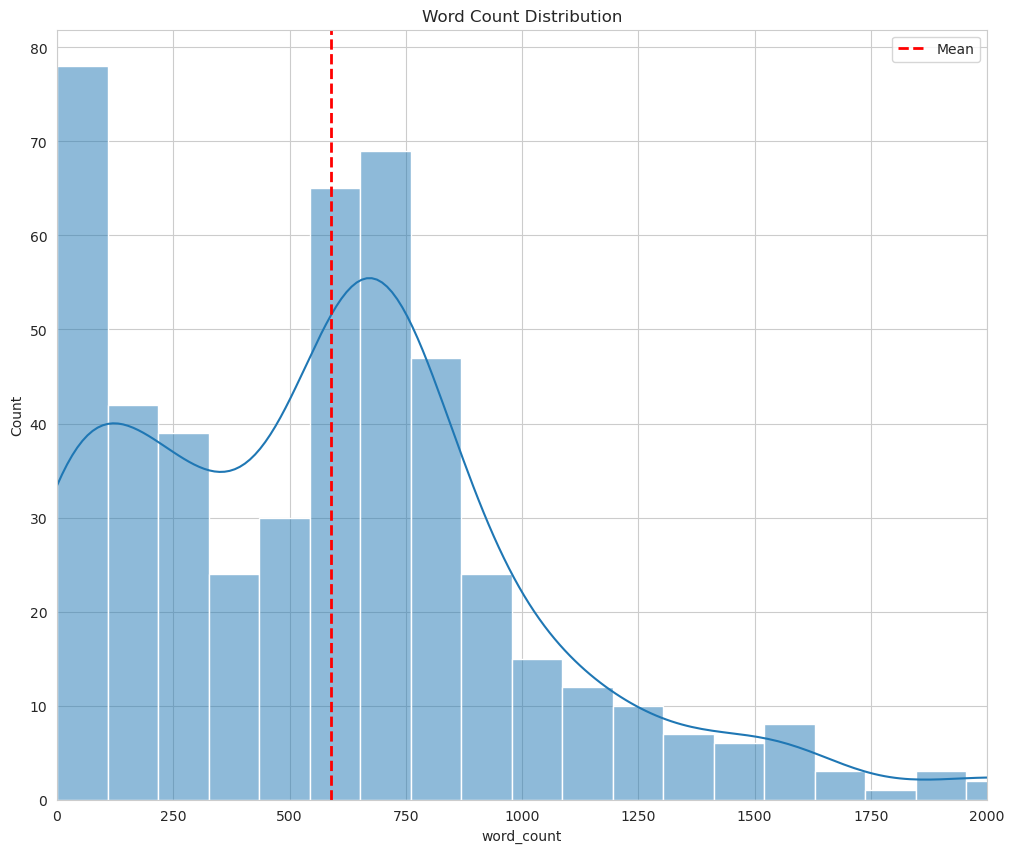

In [20]:
#word count; cut at 1000
plt.figure(figsize=(12, 10))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.xlim(0, 2000)
#mean line
plt.axvline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Word Count Distribution')
plt.show()

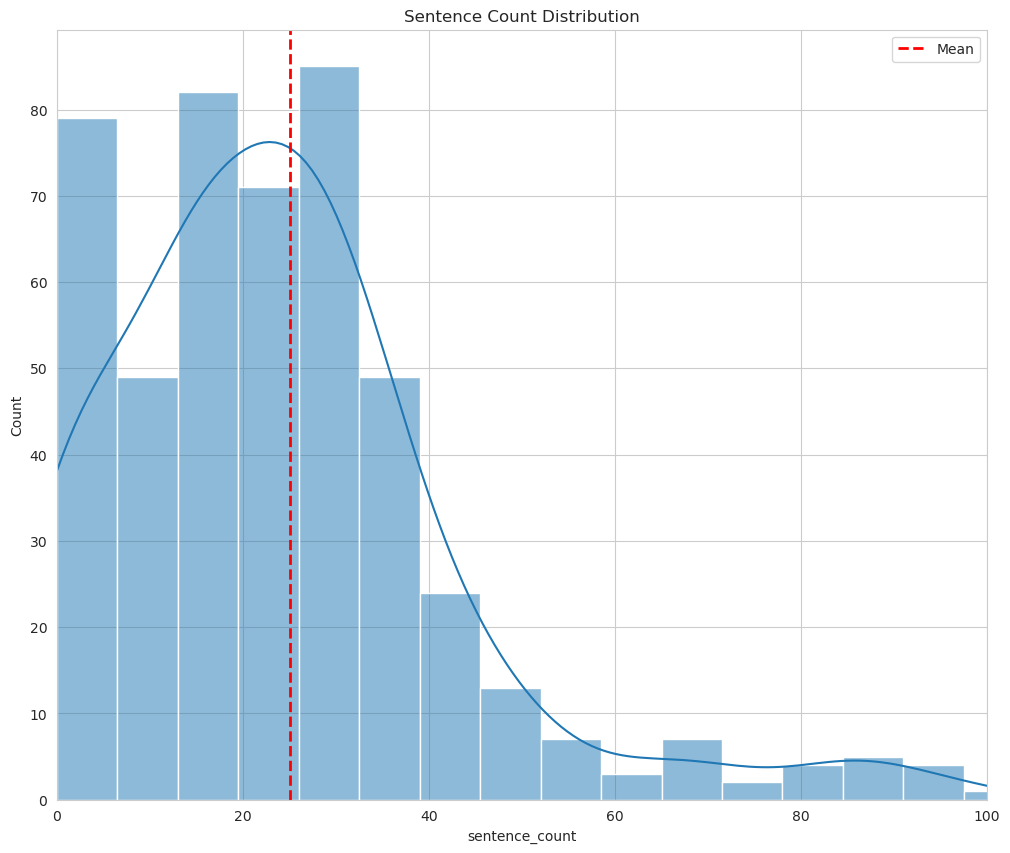

In [21]:
#sentence count; cut at 100
plt.figure(figsize=(12, 10))
sns.histplot(df['sentence_count'], bins=20, kde=True)
plt.xlim(0, 100)
#mean line
plt.axvline(df['sentence_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Sentence Count Distribution')
plt.show()


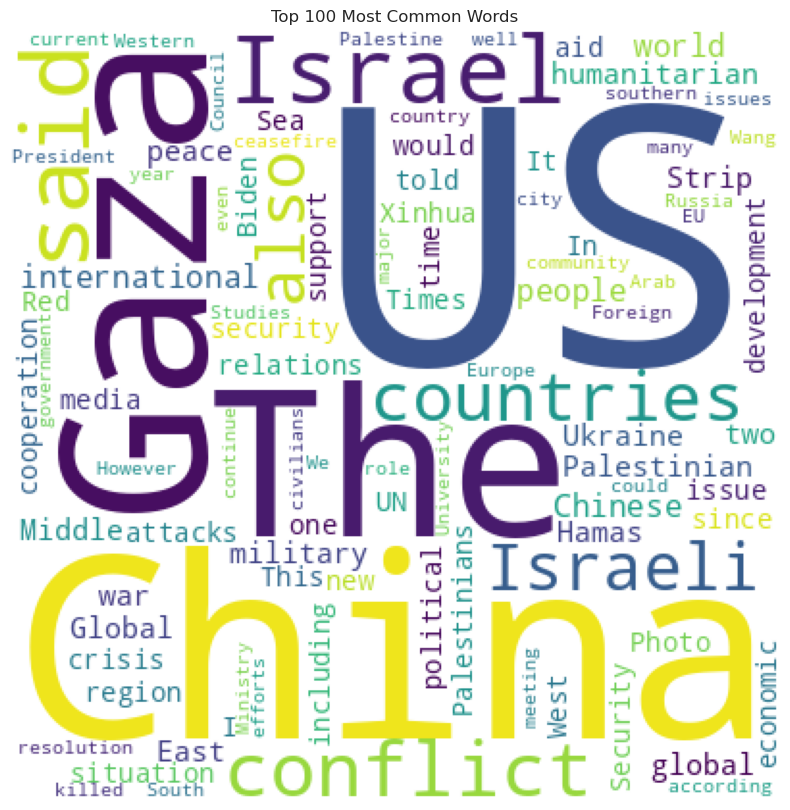

In [22]:
#wordcloud form freqdist
fdist = FreqDist([word for word in word_tokenize(' '.join(df['article_text'])) if word.isalpha() and word not in stop_words])
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

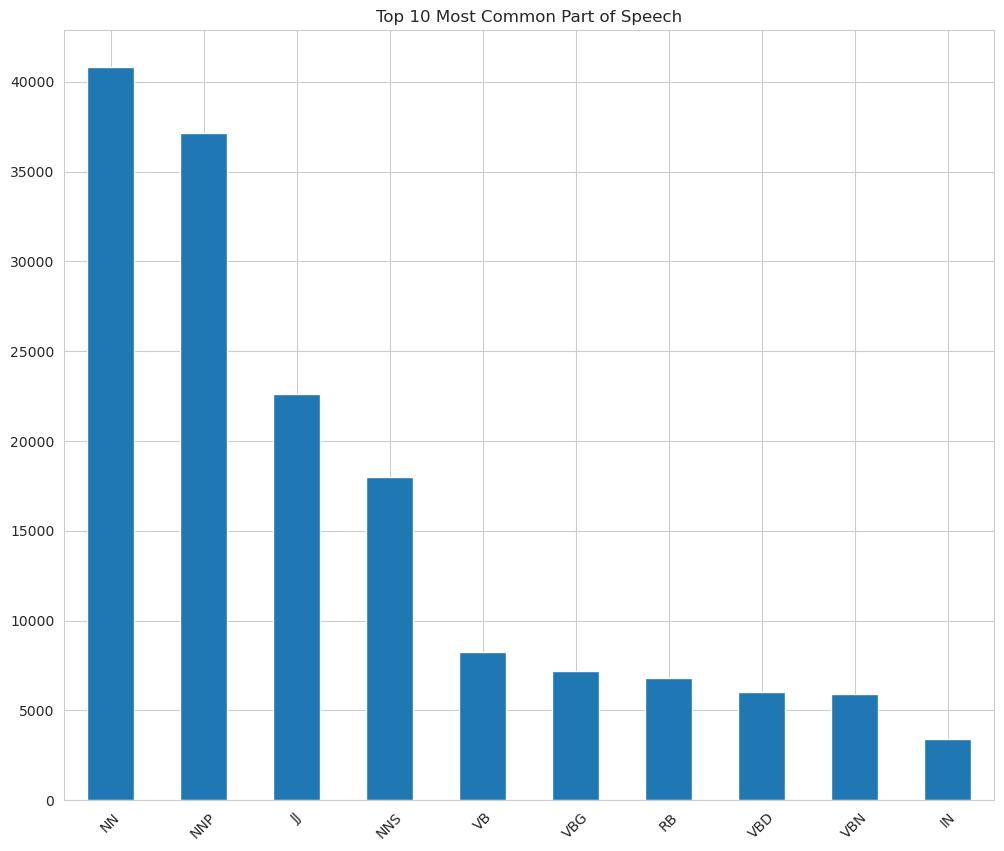

In [23]:
#top 10 most common part of speech
plt.figure(figsize=(12, 10))
df_pos.drop(columns=['sentence_count', 'word_count']).sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Common Part of Speech')
#turn x labels
plt.xticks(rotation=45)
plt.show()

### Total POS

In [33]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="RB" and word.isalpha() and word not in stop_words])

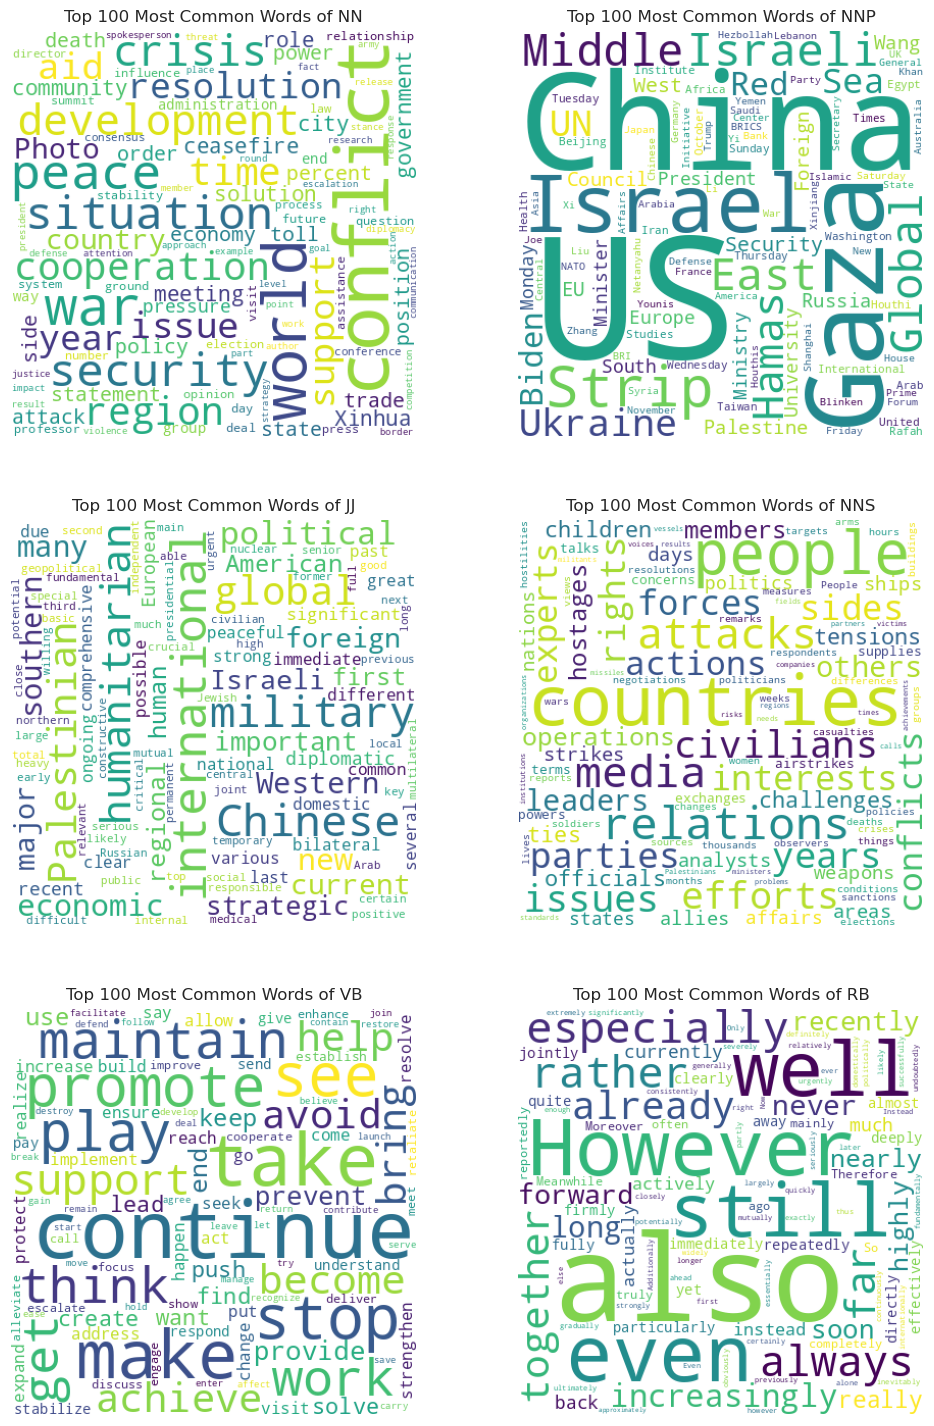

In [34]:
plt.figure(figsize=(12, 18))
plt.subplot(3, 2, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(3, 2, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(3, 2, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(3, 2, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(3, 2, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


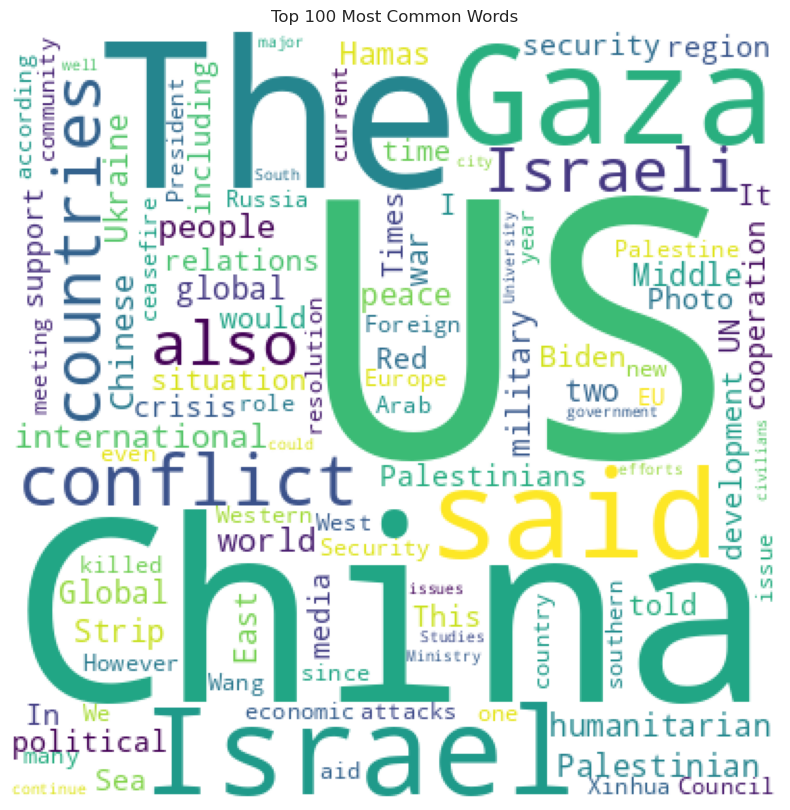

In [35]:
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

Text(0.5, 1.0, 'Article Categories')

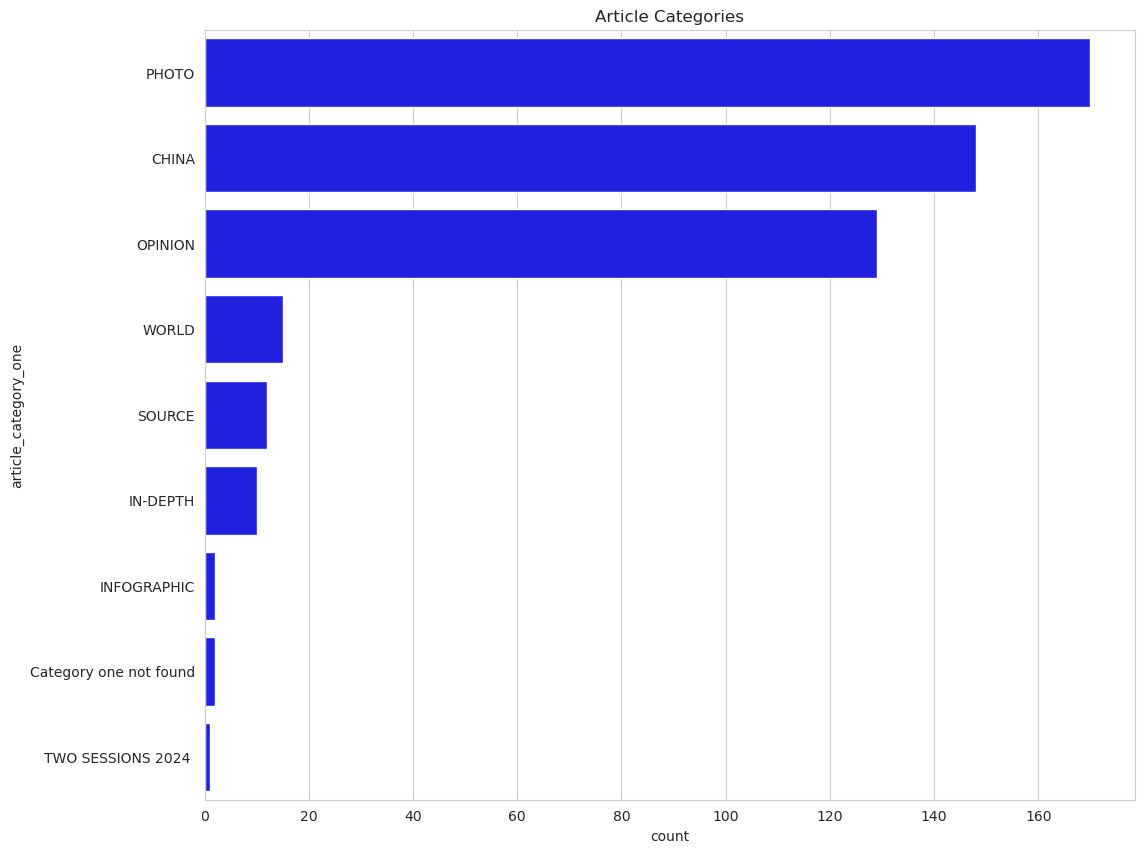

In [36]:
#sns countplot for article categories
plt.figure(figsize=(12, 10))
sns.countplot(y=df['article_category_one'], order=df['article_category_one'].value_counts().index, color='blue')
plt.title('Article Categories')


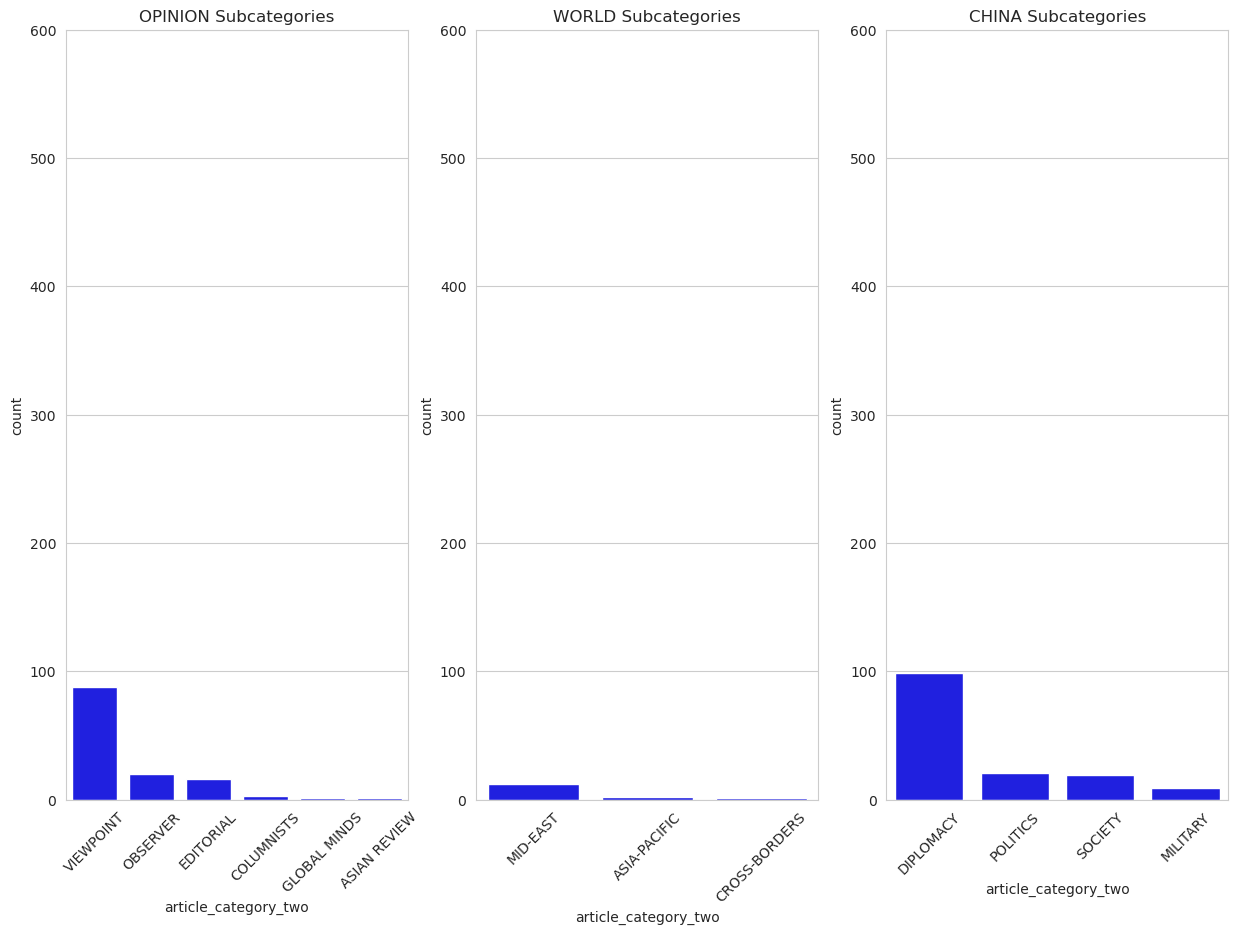

In [37]:
#plot for category one = opinion
#3 plots in a row
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['article_category_one'] == 'OPINION']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'OPINION']['article_category_two'].value_counts().index )
plt.xticks(rotation=45)
plt.ylim(0, 600)
plt.title('OPINION Subcategories')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['article_category_one'] == 'WORLD']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'WORLD']['article_category_two'].value_counts().index)
plt.title('WORLD Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 600)

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['article_category_one'] == 'CHINA']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'CHINA']['article_category_two'].value_counts().index)
plt.title('CHINA Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 600)
plt.show()


### POS: diplomacy vs columnists

In [38]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="RB" and word.isalpha() and word not in stop_words])


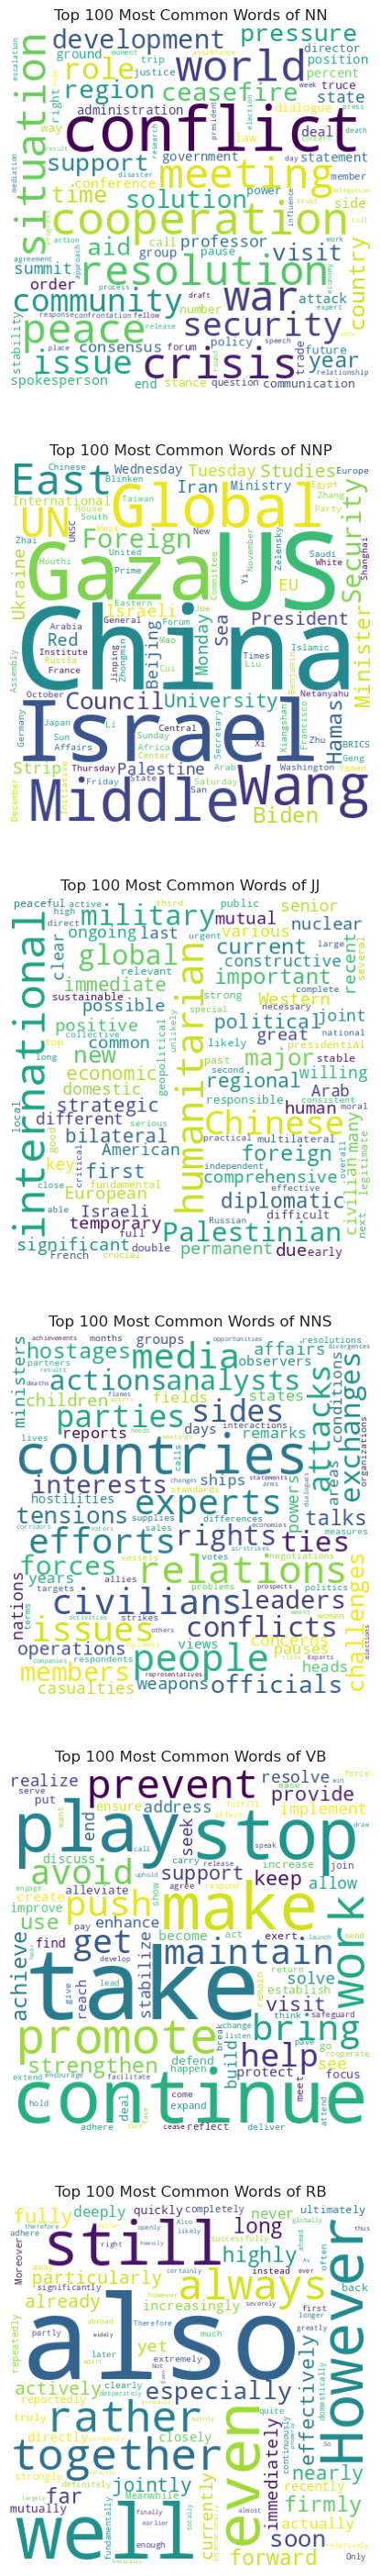

In [39]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


In [40]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="RB" and word.isalpha() and word not in stop_words])


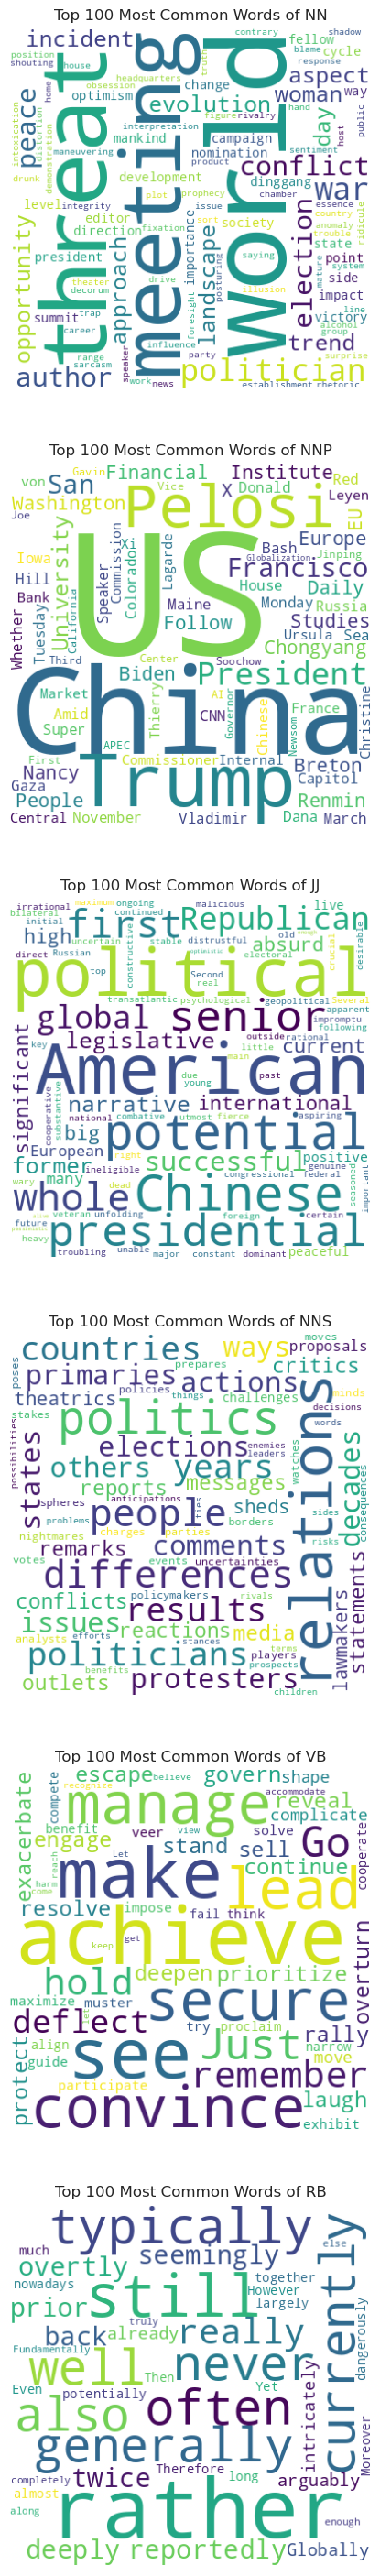

In [41]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(VB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()
